# How to make binned light curves and hardness ratios from daily fits files

## 1. Download VELAX-1_steps_lc.fits file and OccView.py from GBM Earth Occultation website http://heastro.phys.lsu.edu/gbm/.

## 2. Start python

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 3. Examine single step fits file

In [2]:
%system fv VELAX-1_steps_lc.fits

[]

### 6. Load python modules

In [7]:
from OccView import OccView
import scipy.signal
import numpy
import matplotlib.pyplot as plt

### 7. Read FITS file

In [8]:
ov = OccView("VELAX-1_steps_lc.fits")

In [9]:
print ov.eneEdge
print ov.eneEdge[1]
testedge = ov.eneEdge[1]
tests="%.1f-%.1f keV"%(testedge[0],testedge[1])
print tests

[(  11.6729002 ,   26.77063179) (  26.77063179,   50.30397415)
 (  50.30397415,  101.91491699) ( 101.91491699,  294.7149353 )
 ( 294.7149353 ,  539.11651611) ( 539.11651611,  985.02740479)]
(26.770631790161133, 50.30397415161133)
26.8-50.3 keV


### 8. Plot fluxes, binned at Vela X-1's 8.96 day orbital period, for the first 3 energy bands


....Plotting flux


....Plotting flux


....Plotting flux



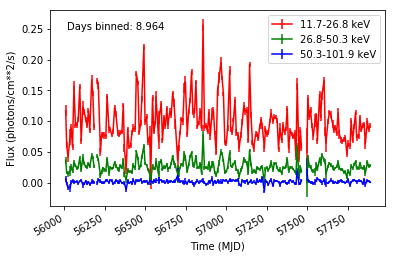

In [10]:
ov.PlotBinnedFluxes(56000,57890,8.9643680,[0,1,2],quality="good",save = "binnedFlux.pdf")

### 9. Bin fluxes at 10x Vela X-1's orbital period and extract the binned values for the first two channels, 12-25 and 25-50 keV.

In [11]:
#first channel (~12-25 keV)
h0=ov.GetBinnedFluxes(56000,57890,89.643680,0)
#second channel (~25-50 keV)
h1=ov.GetBinnedFluxes(56000,57890,89.643680,1)
#get time, flux, and error from first channel
t = h0["time"]
f0 = h0["flux"]
e0 = h0["error"]
#get flux and error from second channel
f1 = h1["flux"]
e1 = h1["error"]


....Plotting flux


....Plotting flux



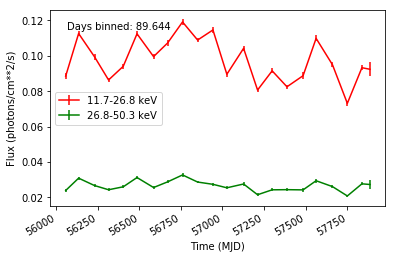

In [12]:
ov.PlotBinnedFluxes(56000,57890,89.643680,[0,1],quality="good",save = "binnedFlux10orb.pdf")

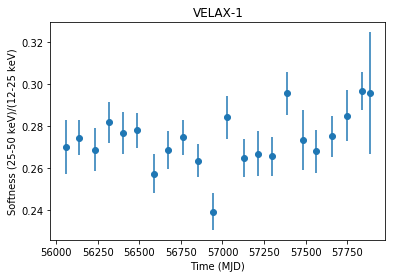

In [13]:
sr=divide(f1,f0) 
srerr=sr*sqrt(divide(e0,f0)**2+divide(e1,f1)**2)
plt.errorbar(t,sr,srerr,fmt='o')
plt.xlabel("Time (MJD)")
plt.ylabel("Softness (25-50 keV)/(12-25 keV)")
plt.title('VELAX-1')